In [2]:
import scipy as sc
import numpy as np
import thinkdsp
import thinkplot
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


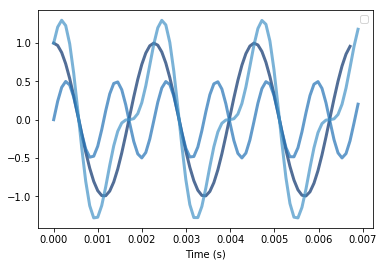

In [3]:
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
cos_sig = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = thinkdsp.SinSignal(freq=880, amp=0.5, offset=0)
cos_sig.plot()
sin_sig.make_wave(duration=0.007).plot()
thinkplot.config(xlabel='Time (s)')
mix = cos_sig + sin_sig
sin_sig.make_wave().make_audio()
# cos_sig.make_wave().make_audio()
# Wklej ponizszy kod do osobnego bloku
mix = sin_sig + cos_sig
mix.make_wave(duration=0.007).plot()
wave = mix.make_wave()
wave.make_audio()

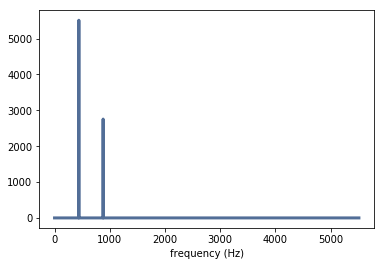

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='frequency (Hz)', legend=False)

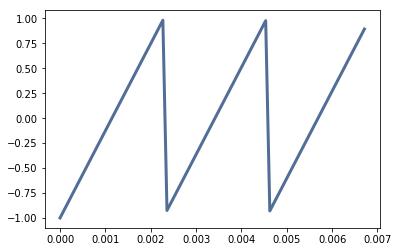

In [5]:
saw_sig = thinkdsp.SawtoothSignal(freq=440)
saw_sig.plot()
saw_wave = saw_sig.make_wave(duration=0.5)
saw_wave.make_audio()

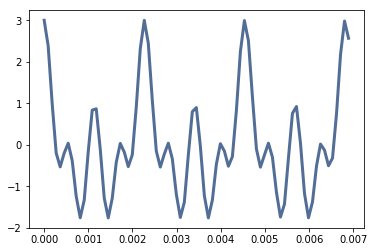

In [12]:
cos_sig1 = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
cos_sig2 = thinkdsp.CosSignal(freq=2*440, amp=1.0, offset=0)
cos_sig3 = thinkdsp.CosSignal(freq=4*440, amp=1.0, offset=0)

cos_sum = cos_sig1 + cos_sig2 + cos_sig3
cos_sum.make_wave(duration=0.007).plot()
wave = cos_sum.make_wave()
wave.make_audio()

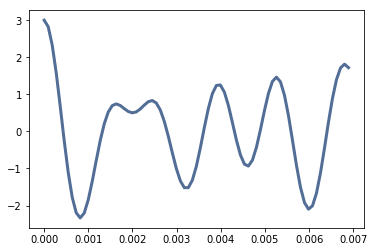

In [14]:
cos_sig11 = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
cos_sig12 = thinkdsp.CosSignal(freq=555, amp=1.0, offset=0)
cos_sig13 = thinkdsp.CosSignal(freq=755, amp=1.0, offset=0)

cos_sum1 = cos_sig11 + cos_sig12 + cos_sig13
cos_sum1.make_wave(duration=0.007).plot()
wave = cos_sum1.make_wave()
wave.make_audio()

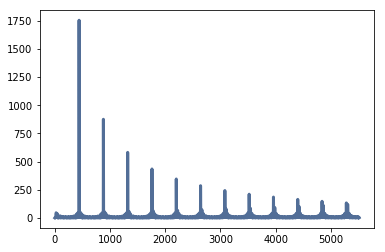

In [15]:
saw_wave.make_spectrum().plot()

In [16]:
spectrum.peaks()[:2]

[(5512.5, 440.0), (2756.249999999999, 880.0)]

In [17]:
import math
PI2 = 2 * math.pi

class SawtoothChirp(thinkdsp.Chirp):
    """Represents a sawtooth signal with varying frequency."""

    def _evaluate(self, ts, freqs):
        """Helper function that evaluates the signal.

        ts: float array of times
        freqs: float array of frequencies during each interval
        """
        dts = np.diff(ts)
        dps = PI2 * freqs * dts
        phases = np.cumsum(dps)
        phases = np.insert(phases, 0, 0)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

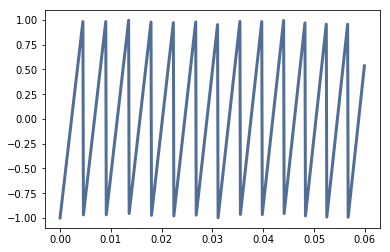

In [18]:
signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=2, framerate=10000)
segment = wave.segment(duration=0.06)
segment.plot()
wave.make_audio()

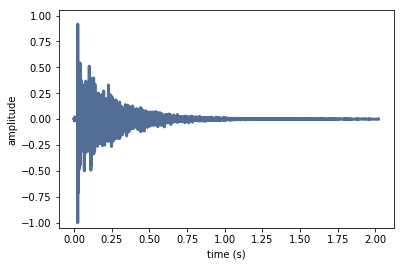

In [21]:
gunshot_response = thinkdsp.read_wave('180960__kleeb__gunshot.wav')
gunshot_response = gunshot_response.segment(start=0.12)
gunshot_response.shift(-0.12)

gunshot_response.normalize()
gunshot_response.plot()
thinkplot.config(xlabel='time (s)', ylabel='amplitude', ylim=[-1.05, 1.05], legend=False)
gunshot_response.make_audio()

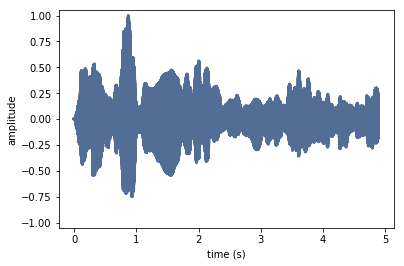

In [23]:
wave = thinkdsp.read_wave('92002__jcveliz__violin-origional.wav')
start = 0.11
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(wave))
wave.normalize()
wave.plot()
thinkplot.config(xlabel='time (s)', ylabel='amplitude',  ylim=[-1.05, 1.05], legend=False)
wave.make_audio()

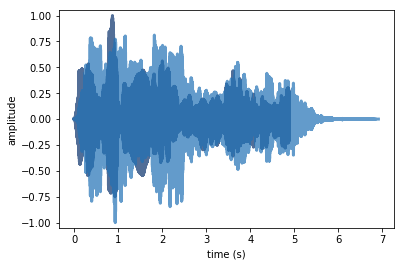

In [24]:
output = wave.convolve(gunshot_response)
output.normalize()
wave.plot(label='original')
output.plot(label='convolved')
thinkplot.config(xlabel='time (s)', ylabel='amplitude', ylim=[-1.05, 1.05])

In [25]:
output.make_audio()

In [33]:
wave = thinkdsp.read_wave('100475__iluppai__saxophone-weep.wav')
wave.normalize()
wave.make_audio()

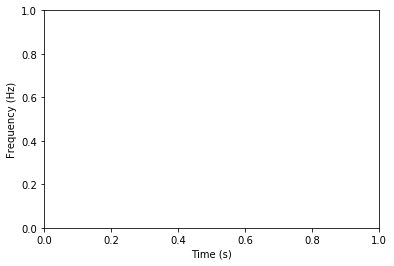

In [37]:
#gram = wave.make_spectrogram(seg_length=1024)
#gram.plot(high=3000)
thinkplot.config(xlabel='Time (s)', ylabel='Frequency (Hz)')

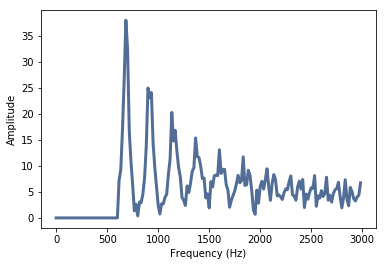

In [38]:
spectrum2 = segment.make_spectrum()
spectrum2.high_pass(600)
spectrum2.plot(high=3000)
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')


In [32]:
segment2 = spectrum2.make_wave()
segment2.make_audio()

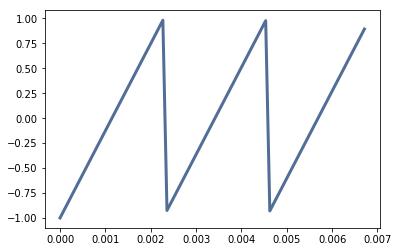

In [40]:
saw_sig = thinkdsp.SawtoothSignal(freq=440)
saw_sig.plot()
saw_wave = saw_sig.make_wave(duration=0.5)
saw_wave.make_audio()

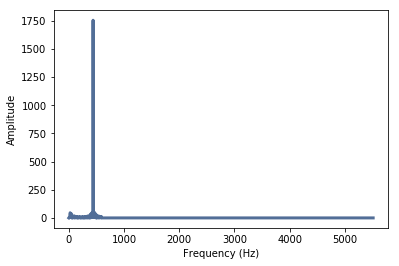

In [52]:
spectrum = saw_wave.make_spectrum()
spectrum.low_pass(600)
spectrum.plot(high=30000)
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

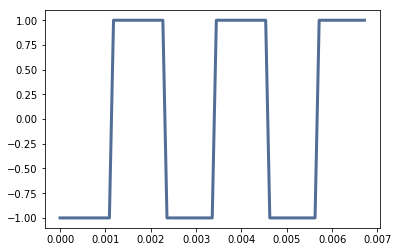

In [42]:
sq_sig = thinkdsp.SquareSignal(freq=440)
sq_sig.plot()
sq_wave = sq_sig.make_wave(duration=2)
sq_wave.make_audio()

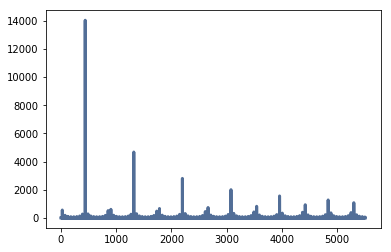

In [47]:
sq_wave.make_spectrum().plot()

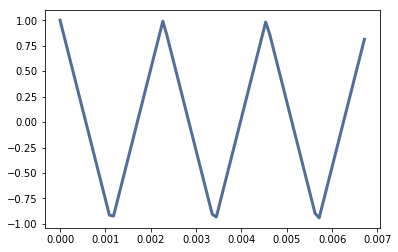

In [44]:
tr_sig = thinkdsp.TriangleSignal(freq=440)
tr_sig.plot()
tr_wave = tr_sig.make_wave(duration=2)
tr_wave.make_audio()

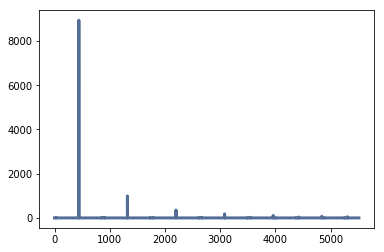

In [46]:
tr_wave.make_spectrum().plot()